# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

In [1]:
import pandas as pd

In [2]:
df_titanic = pd.read_csv('titanic\\train.csv')

In [3]:
df_titanic_ = df_titanic.groupby('Sex').agg('median')['Age']
df_titanic_female_age = df_titanic_[0]
df_titanic_male_age = df_titanic_[1]
print(f'Медиана возраста у мужчин: {df_titanic_male_age}; \nМедиана возраста у женщин: {df_titanic_female_age}')

Медиана возраста у мужчин: 29.0; 
Медиана возраста у женщин: 27.0


In [4]:
values = {"Cabin": 'U', "Embarked": 'U'}
df_titanic = df_titanic.fillna(value=values)

In [6]:
def function(row):
    if None == row.Age:
        if 'male' == row.Sex:
            return df_titanic_male_age
        else:
            return df_titanic_female_age

df_titanic['Age'] = df_titanic.apply(function, axis = 1)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,29.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,27.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,27.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,29.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29.0,0,0,211536,13.0000,U,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,27.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,U,S
889,890,1,1,"Behr, Mr. Karl Howell",male,29.0,0,0,111369,30.0000,C148,C


In [7]:
def function(row):
    if row.Sex == 'male':
        return 0
    else:
        return 1

df_titanic['Sex'] = df_titanic.apply(function, axis = 1)
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,29.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,27.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,27.0,0,0,STON/O2. 3101282,7.9250,U,S


In [8]:
def function(row):
    if row.Embarked == 'U':
        return 0
    elif row.Embarked == 'S':
        return 1
    elif row.Embarked == 'C':
        return 2
    elif row.Embarked == 'Q':
        return 3

df_titanic['Embarked'] = df_titanic.apply(function, axis = 1)
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,29.0,1,0,A/5 21171,7.2500,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,27.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,27.0,0,0,STON/O2. 3101282,7.9250,U,1


In [9]:
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,29.0,1,0,7.2500,1
1,1,1,1,27.0,1,0,71.2833,2
2,1,3,1,27.0,0,0,7.9250,1
3,1,1,1,27.0,1,0,53.1000,1
4,0,3,0,29.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,29.0,0,0,13.0000,1
887,1,1,1,27.0,0,0,30.0000,1
888,0,3,1,27.0,1,2,23.4500,1
889,1,1,0,29.0,0,0,30.0000,2


In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
y = df_titanic['Survived']
X = df_titanic.drop(['Survived'], axis = 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 17)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (668, 7), y_train shape: (668,),
X_test shape: (223, 7), y_test shape: (223,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html

In [14]:
KKN = KNeighborsClassifier(n_neighbors = 5)
GNB = GaussianNB()
DTC = DecisionTreeClassifier()
LR = LogisticRegression()

In [15]:
kkn_model = KKN.fit(x_train, y_train)
gnb_model = GNB.fit(x_train, y_train)
dtc_model = DTC.fit(x_train, y_train)
lr_model = LR.fit(x_train, y_train)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If yo

In [16]:
from sklearn.metrics import confusion_matrix, recall_score

In [17]:
kkn_model_pred = kkn_model.predict(x_test)
gnb_model_pred = gnb_model.predict(x_test)
dtc_model_pred = dtc_model.predict(x_test)
lr_model_pred = lr_model.predict(x_test)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [18]:
for x in [kkn_model_pred, gnb_model_pred, dtc_model_pred, lr_model_pred]:
    print(confusion_matrix(y_test, x))
    print(recall_score(y_test, x, average='macro'))
    print('\n')

[[115  16]
 [ 32  60]]
0.7650182542316628


[[114  17]
 [ 29  63]]
0.77750580816462


[[113  18]
 [ 31  61]]
0.7628194490540989


[[115  16]
 [ 30  62]]
0.7758878194490542




### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

### Из предыдущего задания видно что наименьшее значение recall давала модель dtc_model.

In [19]:
from sklearn.metrics import precision_score, f1_score

In [20]:
precision_score = precision_score(y_test, dtc_model_pred)
precision_score

0.7721518987341772

In [21]:
recall_score = recall_score(y_test, dtc_model_pred, average='macro')
recall_score

0.7628194490540989

F1-мера - это среднее гармоническое точности и полноты.

В лекции говорилось о F-мере, но не об F1 мере. В интернете я нашел, что она вычисляет по формуле:
$$
F1 = 2 * \frac{precision *recall}{precision +recall}
$$

In [22]:
F1 = 2 * (precision_score * recall_score) / (precision_score + recall_score)
F1

0.7590246298390814

Используем встроенную функцию f1_score:

In [23]:
f1_score = f1_score(y_test, dtc_model_pred, average='macro')
f1_score

0.757054664302651

Ну , что ж получилось почти одинаково.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

Посчитаем среднее арифмитическое:

In [24]:
average = (precision_score + recall_score) / 2
average

0.759091825035237

### F1 мера достаточно близка к среднему арифмитическому полноты и точности.

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [25]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [26]:
for x in [kkn_model_pred, gnb_model_pred, dtc_model_pred, lr_model_pred]:
    print(precision_recall_fscore_support(y_test, x))
    print(classification_report(y_test, x))
    print('\n')

(array([0.78231293, 0.78947368]), array([0.8778626 , 0.65217391]), array([0.82733813, 0.71428571]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       131
           1       0.79      0.65      0.71        92

    accuracy                           0.78       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.78      0.78       223



(array([0.7972028, 0.7875   ]), array([0.87022901, 0.68478261]), array([0.83211679, 0.73255814]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       131
           1       0.79      0.68      0.73        92

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



(array([0.7739726 , 0.76623377]), array([0.86259542, 0.64130435]), array([0.8158

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

1) Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).

In [25]:
skf = StratifiedKFold(n_splits = 5, random_state= 17 )

for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

train -  [439 273]   |   test -  [110  69]
train -  [439 273]   |   test -  [110  69]
train -  [439 274]   |   test -  [110  68]
train -  [439 274]   |   test -  [110  68]
train -  [440 274]   |   test -  [109  68]


C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to sp

2) С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.

In [43]:
interval_С = np.logspace(start = -1, stop = 2, num=500)
interval_С

array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.14939935,   0.15148189,   0.15359347,
         0.15573448,   0.15790533,   0.16010645,   0.16233824,
         0.16460115,   0.1668956 ,   0.16922204,   0.1715809 ,
         0.17397264,   0.17639773,   0.17885662,   0.18134978,
         0.1838777 ,   0.18644085,   0.18903974,   0.19167485,
         0.19434669,   0.19705578,   0.19980263,   0.20258777,
         0.20541173,   0.20827506,   0.2111783 ,   0.21412202,
         0.21710676,   0.22013311,   0.22320165,   0.22631296,
         0.22946764,   0.23266629,   0.23590953,   0.23

С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).

In [ ]:
clf = LogisticRegression()

In [26]:
clf = LogisticRegressionCV(Cs = interval_С, cv=skf, scoring='roc_auc', random_state =17, n_jobs=-1,)

In [27]:
clf = clf.fit(x_train, y_train)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to sp

#### Все понял, ранее сделал почти точно так же как вы все описали. Просто не понимал суть того что делаю.

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [35]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [33]:
c_values_mean = np.mean(clf.scores_[1], axis=0)  # axis=0 указывает на то, что мы ищем среднее "по столбцам"
c_values_mean.shape

(500,)

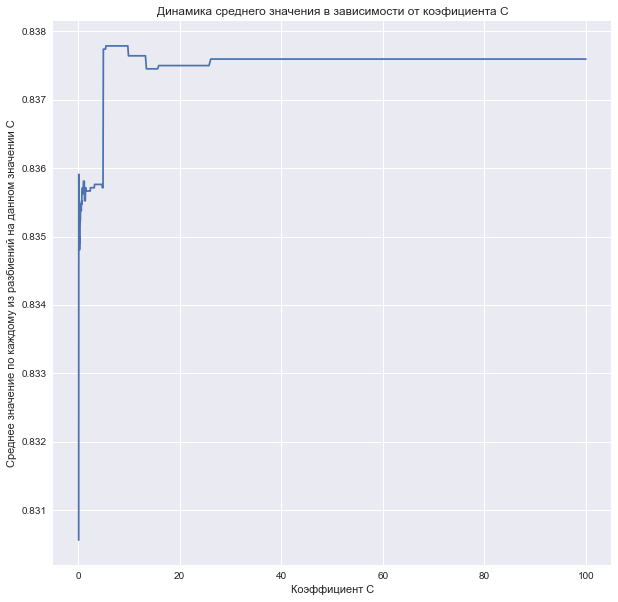

In [38]:
plt.style.use('seaborn')

fix, ax = plt.subplots (figsize = (10, 10))

ax.plot(interval_С, c_values_mean)

ax.set_title('Динамика среднего значения в зависимости от коэфициента С')
ax.set_xlabel('Коэффициент С')
ax.set_ylabel('Cреднее значение по каждому из разбиений на данном значении C')

plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [40]:
clf.C_

array([5.46355035])

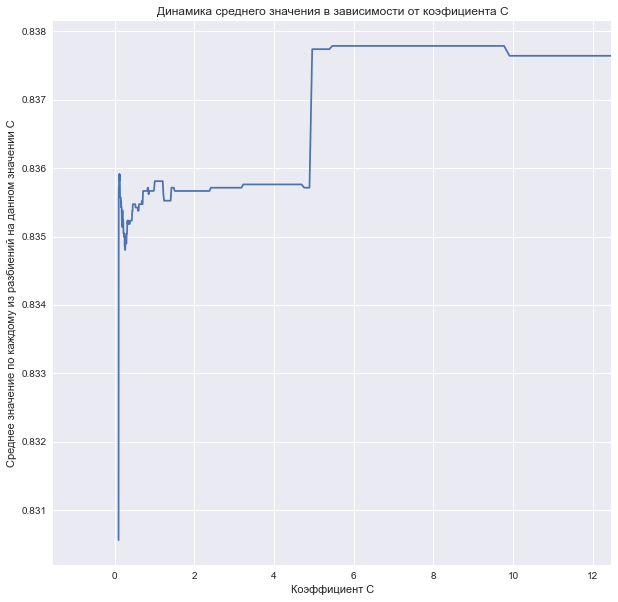

In [47]:
plt.style.use('seaborn')

fix, ax = plt.subplots (figsize = (10, 10))

ax.plot(interval_С, c_values_mean)

left = clf.C_[0]-7
right = clf.C_[0]+7

plt.xlim([left, right]) 
ax.set_title('Динамика среднего значения в зависимости от коэфициента С')
ax.set_xlabel('Коэффициент С')
ax.set_ylabel('Cреднее значение по каждому из разбиений на данном значении C')

plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to sp

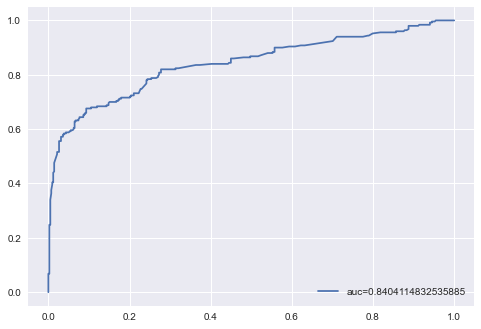

In [50]:
probas = clf.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)